<a href="https://colab.research.google.com/github/haxenhammer/haxenhammer/blob/main/Mydata_%22fashion_mnist_recognition_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Применяем нейронную сеть для распознавания изображений моделей одежды

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
classes = ['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Nectarine Flat',
 'Nut Forest',
 'Nut Pecan',
 'Onion Red',
 'Onion Red Peeled',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach 2',
 'Peach Flat',
 'Pear',
 'Pear 2',
 'Pear Abate',
 'Pear Forelle',
 'Pear Kaiser',
 'Pear Monster',
 'Pear Red',
 'Pear Stone',
 'Pear Williams',
 'Pepino',
 'Pepper Green',
 'Pepper Orange',
 'Pepper Red',
 'Pepper Yellow',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Plum 2',
 'Plum 3',
 'Pomegranate',
 'Pomelo Sweetie',
 'Potato Red',
 'Potato Red Washed',
 'Potato Sweet',
 'Potato White',
 'Quince',
 'Rambutan',
 'Raspberry',
 'Redcurrant',
 'Salak',
 'Strawberry',
 'Strawberry Wedge',
 'Tamarillo',
 'Tangelo',
 'Tomato 1',
 'Tomato 2',
 'Tomato 3',
 'Tomato 4',
 'Tomato Cherry Red',
 'Tomato Heart',
 'Tomato Maroon',
 'Tomato Yellow',
 'Tomato not Ripened',
 'Walnut',
 'Watermelon']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

Загружаем модель в память

In [12]:
model = load_model('fruits_360_model (1).h5')

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

## Загружаем в Colab изображение для распознавания

In [13]:
f = files.upload()

Saving albion-scaled.jpg to albion-scaled.jpg


In [14]:
!ls

 albion-scaled.jpg	    fruits_360_model.h5     sample_data
'fruits_360_model (1).h5'   fruits_360_model.h5.1


In [17]:
img_path = 'albion-scaled.jpg'

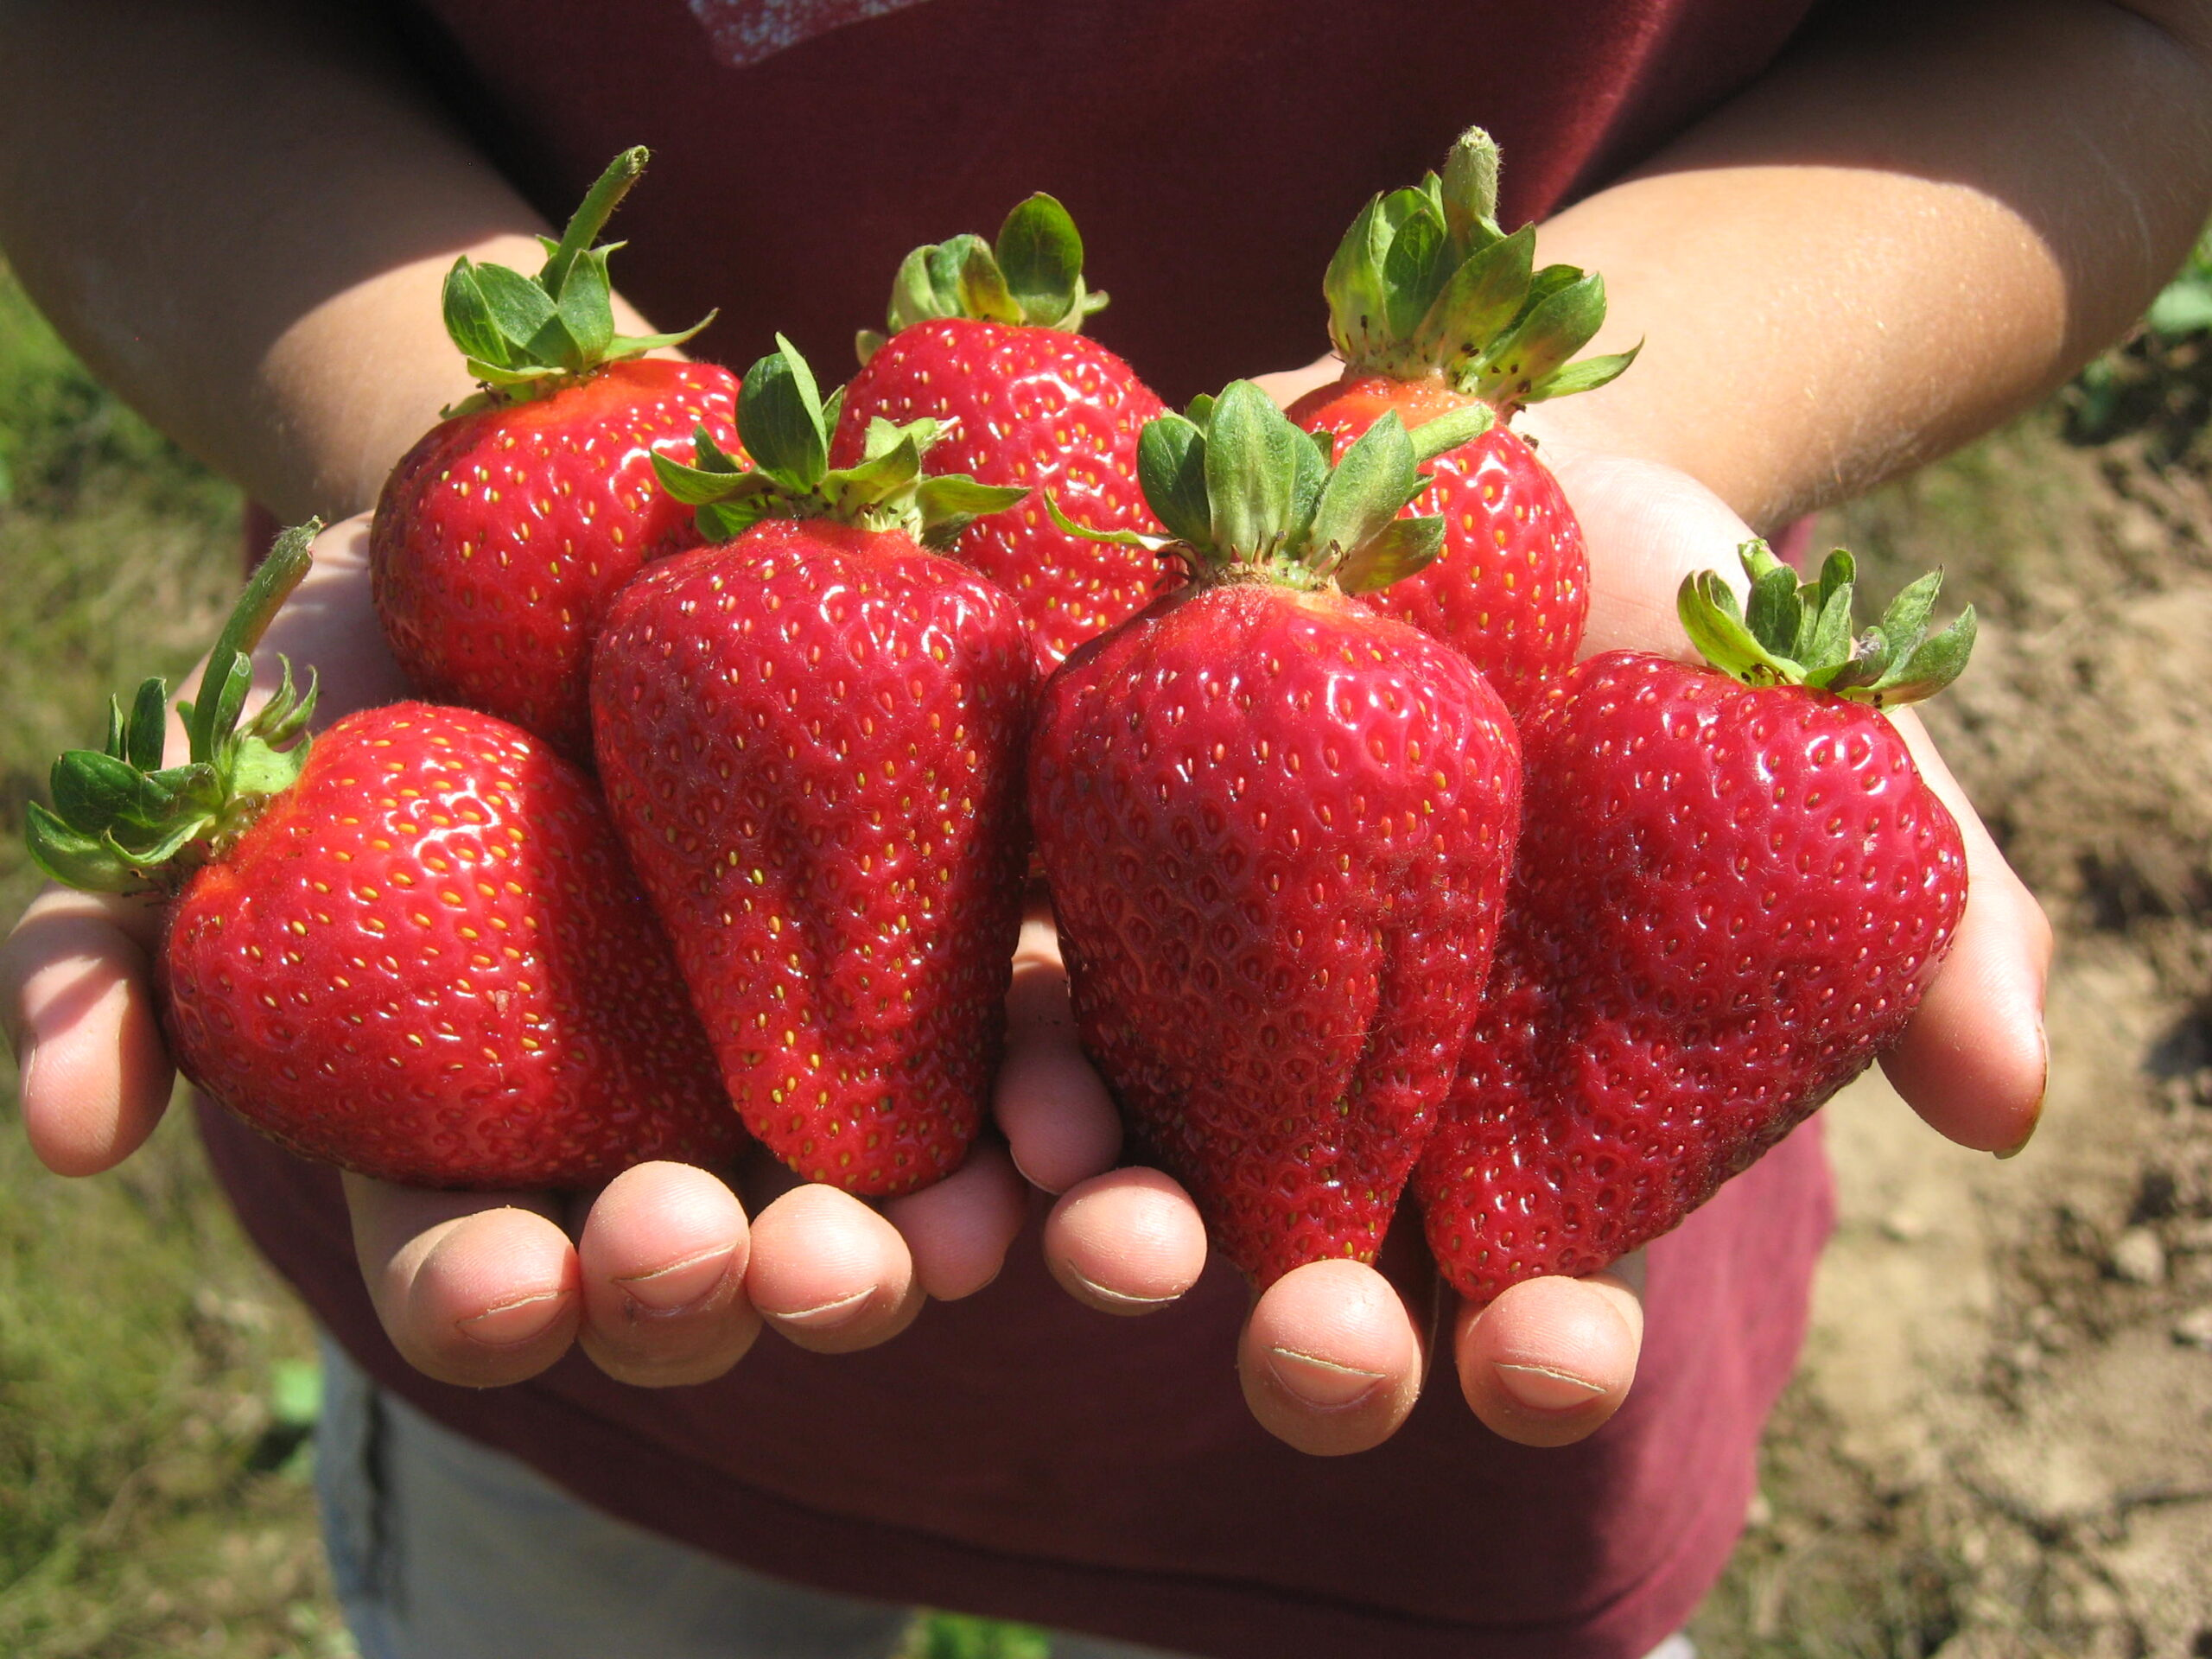

In [59]:
Image(img_path, width=256, height=256)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [117]:
img = image.load_img(img_path, target_size=(100, 100), color_mode = "rgb")

Предварительная обработка изображения

In [125]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape (1, 100, 100, 3)
# Инвертируем изображение
x = 256 - x
# Нормализуем изображение
x /= 256

Запускаем распознавание

In [126]:
prediction = model.predict(x)

1/1 [==============================] - 6s 6s/step


Результаты распознавания

In [127]:
prediction

array([[0.00758001, 0.007478  , 0.00708249, 0.00778136, 0.00749247,
        0.00722313, 0.00738138, 0.00718595, 0.00694342, 0.00719946,
        0.00796945, 0.0074817 , 0.00830125, 0.0073124 , 0.00741368,
        0.00768965, 0.00795799, 0.00873808, 0.00803223, 0.00810303,
        0.00760889, 0.00778472, 0.0075463 , 0.00759098, 0.00823244,
        0.00813196, 0.00802071, 0.00724048, 0.0076574 , 0.00740712,
        0.00780829, 0.00781478, 0.0079397 , 0.00765912, 0.00793224,
        0.00812368, 0.00750906, 0.00848833, 0.00781108, 0.00861376,
        0.00796446, 0.00766079, 0.00791611, 0.0076857 , 0.00752856,
        0.00686919, 0.00769252, 0.00763314, 0.00779117, 0.00716054,
        0.00782336, 0.00754343, 0.00745656, 0.00753629, 0.00778612,
        0.00805147, 0.00670063, 0.00686883, 0.00771987, 0.00797348,
        0.00734824, 0.00717348, 0.00706633, 0.00729502, 0.00782421,
        0.00737212, 0.00737331, 0.00805786, 0.00745752, 0.00803013,
        0.00795163, 0.00792965, 0.00742456, 0.00

In [128]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 17
Название класса: Banana Lady Finger
